<a href="https://colab.research.google.com/github/thegeekyb0y/sms-spam-classifier/blob/main/email_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Dataset

In [ ]:

import pandas as pd
import numpy as np


dataset = pd.read_csv("spam.csv",encoding= "latin1")

In [ ]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
dataset.sample(5)

,v1,v2
335,ham,"Ta-Daaaaa! I am home babe, are you still up ?"
428,ham,7 at esplanade.. Do Ì_ mind giving me a lift c...
4967,ham,Future is not what we planned for tomorrow.......
1237,ham,Is ur paper in e morn or aft tmr?
3275,ham,Lol your right. What diet? Everyday I cheat an...


In [ ]:
#renaming v1 v2 to target and text respectively
dataset.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
dataset['target']=encoder.fit_transform(dataset['target'])

In [ ]:
#missing values check
dataset.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#duplicate values check
dataset.duplicated().sum()

403

In [ ]:
#removing duplicated values
dataset.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
dataset['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

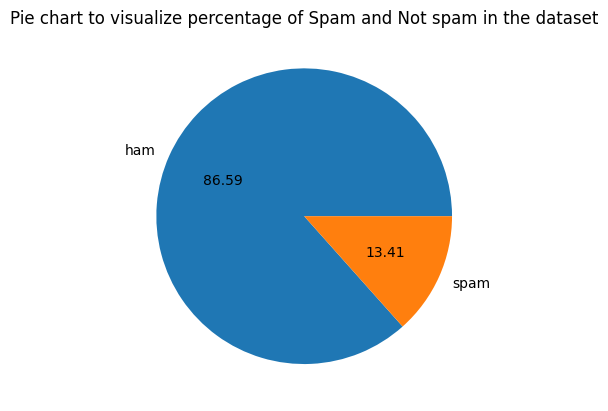

In [ ]:
import matplotlib.pyplot as plt
plt.pie(dataset['target'].value_counts(),labels=["ham","spam"],autopct="%.02f")
plt.title("Pie chart to visualize percentage of Spam and Not spam in the dataset")
plt.show()

In [ ]:
# There is 'imbalance' in this dataset with so much ham and less of spam

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#getting number of characters in each sentence
dataset['num_characters']=dataset['text'].apply(len)

In [ ]:
#fetch number of words in each sms
dataset['num_words']= dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
#fetch number of sentences in each sms
dataset['num_sentences']= dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
dataset.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
dataset[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# describing ham data
dataset[dataset['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#describing spam data
dataset[dataset['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


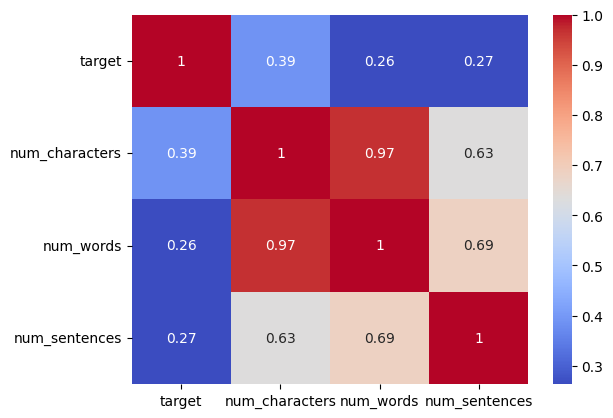

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#correlation matrix
corr = dataset[['target','num_characters','num_words','num_sentences']].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


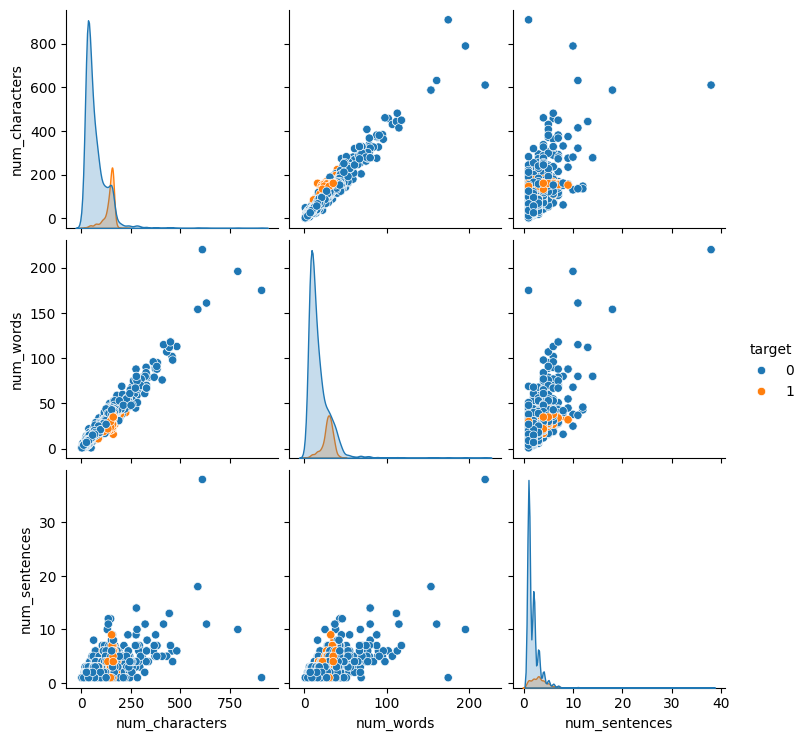

In [ ]:
#pairplot
sns.pairplot(dataset,hue='target')

## Data Preprocessing

Steps:

1. Lower case

2. Tokenization

3. Removing special characters

4. Removing stop words and punctuation

5. Stemming

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_text("Did you like my presentation?")

'like present'

In [ ]:
dataset['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
dataset['transformed_text']=dataset['text'].apply(transform_text)

In [ ]:
dataset.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Spam Word Cloud:

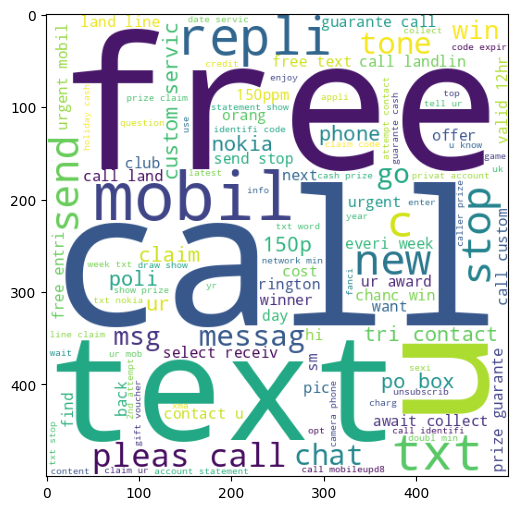

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(dataset[dataset['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

Not Spam/Ham Word Cloud

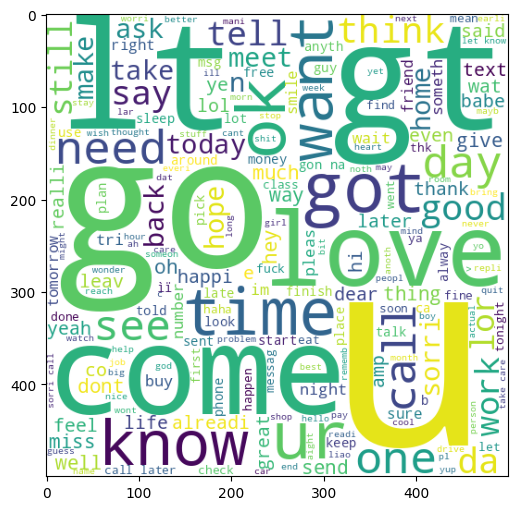

In [ ]:
ham_wc = wc.generate(dataset[dataset['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in dataset[dataset['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
ham_corpus = []
for msg in dataset[dataset['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# Text Vectorization using Bag of words and Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(dataset['transformed_text']).toarray()
y = dataset['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672645739910314
[[841 116]
 [ 32 126]]
0.5206611570247934


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748878923766816
[[955   2]
 [ 26 132]]
0.9850746268656716


In [127]:
import pickle
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

In [128]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

Comparing with different classification models

---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9713004484304932, 0.9846153846153847)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9713004484304932
Precision -  0.9846153846153847
For  KN
Accuracy -  0.9040358744394619
Precision -  1.0
For  NB
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
For  DT
Accuracy -  0.9246636771300448
Precision -  0.8775510204081632
For  LR
Accuracy -  0.9515695067264573
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9659192825112107
Precision -  0.9838709677419355
For  AdaBoost
Accuracy -  0.9596412556053812
Precision -  0.959349593495935
For  BgC
Accuracy -  0.95695067264574
Precision -  0.9166666666666666
For  ETC
Accuracy -  0.9713004484304932
Precision -  0.9921875
For  GBDT
Accuracy -  0.9363228699551569
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9614349775784753
Precision -  0.967479674796748


Improving performance

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
print(performance_df1)

   Algorithm   variable     value
0         KN   Accuracy  0.904036
1        ETC   Accuracy  0.971300
2         NB   Accuracy  0.965022
3        SVC   Accuracy  0.971300
4         RF   Accuracy  0.965919
5        xgb   Accuracy  0.961435
6         LR   Accuracy  0.951570
7   AdaBoost   Accuracy  0.959641
8       GBDT   Accuracy  0.936323
9        BgC   Accuracy  0.956951
10        DT   Accuracy  0.924664
11        KN  Precision  1.000000
12       ETC  Precision  0.992188
13        NB  Precision  0.991736
14       SVC  Precision  0.984615
15        RF  Precision  0.983871
16       xgb  Precision  0.967480
17        LR  Precision  0.964286
18  AdaBoost  Precision  0.959350
19      GBDT  Precision  0.930693
20       BgC  Precision  0.916667
21        DT  Precision  0.877551


In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904036,1.000000,0.904036,1.000000,0.904036,1.000000,0.904036,1.000000
1,ETC,0.971300,0.992188,0.971300,0.992188,0.971300,0.992188,0.971300,0.992188
2,NB,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736
3,SVC,0.971300,0.984615,0.971300,0.984615,0.971300,0.984615,0.971300,0.984615
4,RF,0.965919,0.983871,0.965919,0.983871,0.965919,0.983871,0.965919,0.983871
5,xgb,0.961435,0.967480,0.961435,0.967480,0.961435,0.967480,0.961435,0.967480
6,LR,0.951570,0.964286,0.951570,0.964286,0.951570,0.964286,0.951570,0.964286
7,AdaBoost,0.959641,0.959350,0.959641,0.959350,0.959641,0.959350,0.959641,0.959350
8,GBDT,0.936323,0.930693,0.936323,0.930693,0.936323,0.930693,0.936323,0.930693
9,BgC,0.956951,0.916667,0.956951,0.916667,0.956951,0.916667,0.956951,0.916667


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9775784753363229
Precision 1.0


Apply STacking

In [ ]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9802690582959641
Precision 0.9788732394366197


Using pickle files to import models and vectorizer

In [126]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))